In [2]:
from torch_geometric.datasets import TUDataset
import numpy as np
from sklearn.decomposition import PCA
import torch
from config import Dataset
from dataset import get_dataset

In [3]:
ds = get_dataset(Dataset.PROTEINS)
ds.num_features, ds.num_classes, len(ds)

(4, 2, 1113)

In [4]:
ds.y.unique()

tensor([0, 1])

In [5]:
ds.num_edge_labels

0

In [6]:
ds.y.sum()/ds.y.shape[0]

tensor(0.4043)

In [7]:
ds.x

tensor([[23.,  1.,  0.,  0.],
        [10.,  1.,  0.,  0.],
        [25.,  1.,  0.,  0.],
        ...,
        [ 4.,  0.,  0.,  1.],
        [ 4.,  0.,  0.,  1.],
        [ 4.,  0.,  0.,  1.]])

In [8]:
np.unique(ds.x[:,0], axis=0)

array([-538., -345., -344., -134., -125.,  -96.,    1.,    2.,    3.,
          4.,    5.,    6.,    7.,    8.,    9.,   10.,   11.,   12.,
         13.,   14.,   15.,   16.,   17.,   18.,   19.,   20.,   21.,
         22.,   23.,   24.,   25.,   26.,   27.,   28.,   29.,   30.,
         31.,   32.,   33.,   34.,   35.,   36.,   37.,   38.,   39.,
         41.,   42.,   47.,   61.,   63.,   73.,   74.,   75.,   82.,
        104.,  353.,  355.,  360.,  558.,  797.,  798.], dtype=float32)

In [9]:
len(np.unique(ds.x[:,0], axis=0))

61

In [10]:
ds.edge_index

tensor([[    0,     0,     0,  ..., 43470, 43470, 43470],
        [   11,    22,    32,  ..., 43438, 43468, 43469]])

In [11]:
ds.num_node_features

4

In [12]:
d = ds[0]
d.y[0] == 0

tensor(True)

In [13]:
# Visualize the graph
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.model_selection import StratifiedShuffleSplit
import os

In [14]:
_, indexes = next(StratifiedShuffleSplit(n_splits=1, test_size=9, random_state=42).split(ds, ds.y))

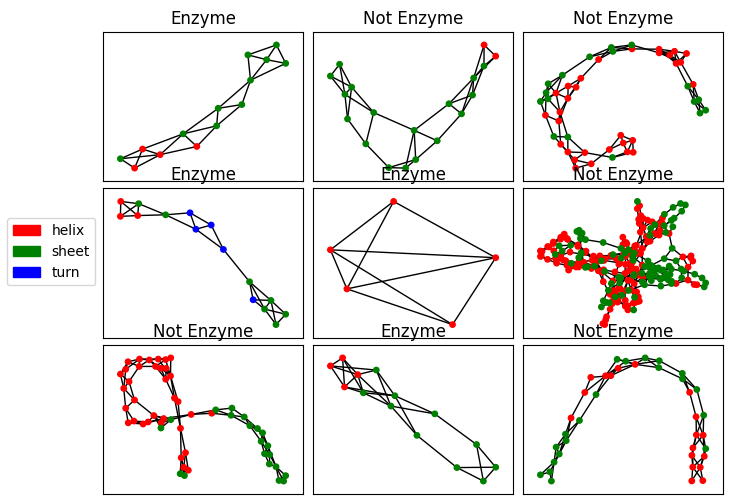

In [16]:
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(3, 3, wspace=0.05, hspace=0.05)
axes = gs.subplots()
color_map = ["red", "green", "blue"]
for i in range(3):
    for j in range(3):
        G = nx.Graph()
        d = ds[indexes[i*3+j]]
        G.add_edges_from(d.edge_index.T.tolist())
        colors = [color_map[torch.nonzero(n[1:]).squeeze()] for n in d.x]
        nx.draw_networkx(G, ax=axes[i, j], node_color=colors, with_labels=False, node_size=15)
        
        axes[i, j].set_title("Enzyme" if d.y else "Not Enzyme")

fig.legend([patches.Patch(color=c, capstyle="round") for c in color_map], ["helix", "sheet", "turn"], loc="center left")
os.makedirs("./generated_images", exist_ok=True)
fig.savefig("./generated_images/PROTEINS-examples.svg", format="svg", dpi=1200)
plt.show()

In [13]:
pca = PCA(n_components=4)
pca.fit(ds.x)

PCA(n_components=4)

In [14]:
print(pca.explained_variance_ratio_)

[9.96709412e-01 2.99395319e-03 2.96635179e-04 3.84787544e-33]


In [15]:
new_x = pca.transform(ds.x)
new_x

array([[ 1.50952053e+01, -5.45326474e-01, -2.73841761e-02,
        -6.03072446e-16],
       [ 2.09592392e+00, -6.81488027e-01, -3.93894533e-02,
        -6.03072446e-16],
       [ 1.70950947e+01, -5.24378543e-01, -2.55372104e-02,
        -6.03072446e-16],
       ...,
       [-3.91224373e+00, -4.10827076e-02,  1.18200422e+00,
        -5.96923343e-15],
       [-3.91224373e+00, -4.10827076e-02,  1.18200422e+00,
        -5.96923343e-15],
       [-3.91224373e+00, -4.10827076e-02,  1.18200422e+00,
        -5.96923343e-15]])